In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [33]:
activity = pd.read_csv(os.path.join('andrew_data2.csv'))
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2850013230,Run,Hike,NaN,07.11.2019 16:46:32,16.8,Afternoon Run,42.1,0.458,92.08,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3022102505,3022102505,-28800,2019-11-07,NaN,https://www.strava.com/activities/2850013230
1,2895327719,Run,Hike,NaN,22.11.2019 17:05:04,17.1,Afternoon Run,20.1,0.234,85.91,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3077242534,3077242534,-28800,2019-11-22,NaN,https://www.strava.com/activities/2895327719
2,2832492215,Run,Hike,NaN,31.10.2019 15:41:16,15.7,Afternoon Run,62.1,0.870,71.53,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283821,3002283821,-25200,2019-10-31,NaN,https://www.strava.com/activities/2832492215
3,2832492192,Run,Hike,NaN,28.10.2019 15:17:05,15.3,Afternoon Run,42.1,0.686,61.27,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283809,3002283809,-25200,2019-10-28,NaN,https://www.strava.com/activities/2832492192
4,2877878037,Run,Hike,NaN,18.11.2019 16:00:16,16.0,Afternoon Run,52.1,0.907,57.47,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3055046850,3055046850,-28800,2019-11-18,NaN,https://www.strava.com/activities/2877878037


In [34]:
activity_clean = activity[["type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
activity_clean.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [35]:
data2 = activity_clean.dropna()
data2.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [36]:
data2.dtypes

type_m                object
x_start_h            float64
x_min                float64
average_heartrate    float64
max_heartrate        float64
average_cadence      float64
dtype: object

In [37]:
X = data2.drop("type_m", axis=1)
y = data2["type_m"]
print(X.shape, y.shape)

(408, 5) (408,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [40]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9477124183006536
Testing Data Score: 0.9313725490196079


In [44]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Hike' 'Run' 'Run' 'Run' 'Run' 'Run' 'Run' 'Run' 'Hike' 'Run']
First 10 Actual labels: ['Run', 'Run', 'Run', 'Run', 'Run', 'Run', 'Run', 'Run', 'Hike', 'Run']


In [45]:
prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
prediction_df.head(20)

,Prediction,Actual
0,Hike,Run
1,Run,Run
2,Run,Run
3,Run,Run
4,Run,Run
5,Run,Run
6,Run,Run
7,Run,Run
8,Hike,Hike
9,Run,Run


In [46]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test,predictions)

In [47]:
cm

array([[ 8,  3,  1],
       [ 2,  7,  0],
       [ 0,  1, 80]], dtype=int64)

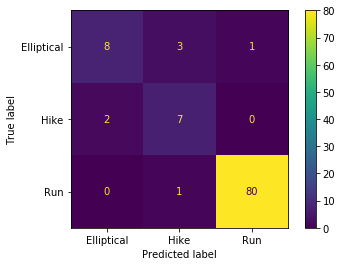

In [48]:
plot_confusion_matrix(classifier,X_test_scaled,y_test)

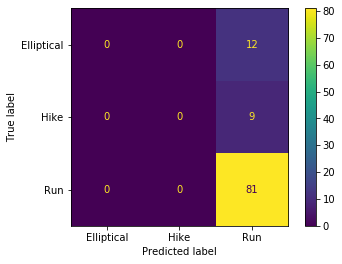

In [49]:
#without scaling

plot_confusion_matrix(classifier,X_test,y_test)